In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("data.csv")
#print (type(data))  IL DATA SET è DI TIPO <class 'pandas.core.frame.DataFrame'>
#print (data["pixel0"])
#print (data.head())
#data.apply(lambda var: var if var>0 else var-1) CREA UN NUOVO DATA SET CON LA CONDIZIONE RISPETTATA


#transform data set into a matrix. we lose all info about columns et cetera
#now we can perform operations
data = np.array(data) 
print(data.shape)


#flattering --> convert a matrix into a vector concatenating the rows together
#data set has 42000 observations of 28x28 dimension
#flattering 28 x 28 -> 784 = 28* 28 dimensional vector

#X is dimension (42000, 784)
#Y is dimension (42000,)
#Y is the first column of data, X is the rest
Y = data[:, 0]
X = data[:, 1:].T  #transposition

def specify_sample(X, Y, dig):
    ind = Y == dig
    Y_dig = Y[ind]
    X_dig = X[:, ind]
    return (X_dig, Y_dig)
digits = (0, 6, 9)

X_0, Y_0 = specify_sample(X, Y, 0)
X_1, Y_1 = specify_sample(X, Y, 1)


d, N = X.shape  #d == numero pixel, N == numero di elementi del sample

print(X_0.shape, Y_0.shape)

(42000, 785)
(784, 4132) (4132,)


In [2]:
a = np.arange(42000)
print( a== 0  )


[ True False False ... False False False]


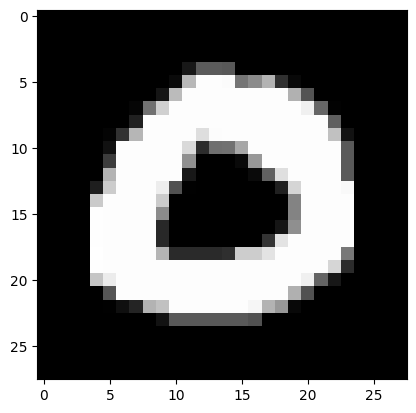

In [3]:
#how to visualize images in python?
import matplotlib.pyplot as plt

#load image in memory
idx = 10          #label of the image --> it's the 11th image
img = X_0[:, idx]  #opposite of flattering = reshape
img = np.reshape(img, (28, 28))

#visualize
plt.imshow(img, cmap="gray")     #map a number with a color
plt.show()
#print(len(Y))
#print(Y[idx])

In [4]:
#create a function that takes as input a dataset X and an integer Ntrain,  and returns arrays Xtrain and Xtest Ytrain and Ytest where:
#X train is composed by N_train random samples from X
#X test is the rest of the array X
#Ytrain and Ytest accordingly

#Limitation == sample has to be random --> np.random.shuffle

def split_data( X, Y, Ntrain):
    d, N = X.shape
    idx = np.array(range(0, N)) #------------------> la stessa cosa la fa idx = np.arange(N)
    np.random.shuffle(idx)
    print(idx)
    X_train = X[:, idx[:Ntrain]]
    X_test = X[:, idx[Ntrain:]]
    Y_train = Y[idx[:Ntrain]]
    Y_test = Y[idx[Ntrain:]]
    return (X_train, Y_train), (X_test, Y_test)

(X_train, Y_train), (X_test, Y_test) = split_data (X, Y, 30000)
print(Y_train.shape, Y_test.shape)
print(X_train.shape, X_test.shape)


[20702  8838   774 ... 18444 23498  7201]
(30000,) (12000,)
(784, 30000) (784, 12000)


array([[-988.95760985,  816.74421047,  426.42891413, ...,  863.63911964,
         351.51938928,  509.39660519],
       [ 771.40993283,   39.58576895, -274.09829339, ..., -273.11376399,
        -533.86353033, -263.94882012]])

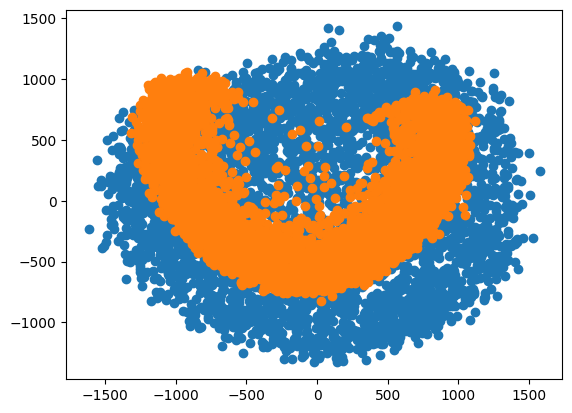

In [5]:
#SVD of a matrix A
# U, s, VT = np.linalg.svd(A) ---> parametro full_matrices = False
# s è un vettore che contiene i singular values 
#Write a function that takes as input a matrix X amd an integer k, and returns Z = Uk^T X, the pca of X

import matplotlib.pyplot as plt


def SVD (X, k):
    d, N = X.shape
    #centroid
    #c_X = np.mean(MATRIX = X, AXIS = 1) AXIS = 1 --> operazione per colonne =0 ---> operazione per righe. 
                                    #se non metto il parametro axis --> fa l'operazione su tutti i numeri della matrice (rest. un numero)
    c_X = np.mean(X, 1)
    
    #Operations between matrix and vector
    # ---> Operation between matrix and column vector --> reshaping as a ()

    #np.reshape(c_X, (1, d))
    Xc = X- np.expand_dims(c_X, axis=1)     #mean centered data
    #print(np.expand_dims(c_X, axis=1).shape)
    U, s, VT = np.linalg.svd(Xc, full_matrices = False)
    
    Uk = U[:, :k]
    #VkT = VT[:k, :]
    #Sk = np.diag(s)  ----> matrice diagonale con s vettore al suo interno . posso anche forse fare una mat rettang , guarda doc

    Zk = Uk.T@Xc
    plt.plot(Zk[0], Zk[1], "o")
    #print (Zk)
    return Zk
    

SVD (X_0, 2)
SVD (X_1, 2)


[1.62656414e+03 9.03785069e+02 6.13804155e+02 2.93489525e+02
 2.02896460e+02 1.47918633e+02 1.06599010e+02 9.87912986e+01
 7.39564309e+01 3.83206950e+01 1.50134456e-13 1.35705511e-13
 1.35705511e-13 1.35705511e-13 1.35705511e-13 1.35705511e-13
 1.35705511e-13 1.35705511e-13 1.35705511e-13 1.35705511e-13
 1.35705511e-13 1.35705511e-13 1.35705511e-13 1.35705511e-13
 1.35705511e-13 1.35705511e-13 1.35705511e-13 4.28806195e-14]


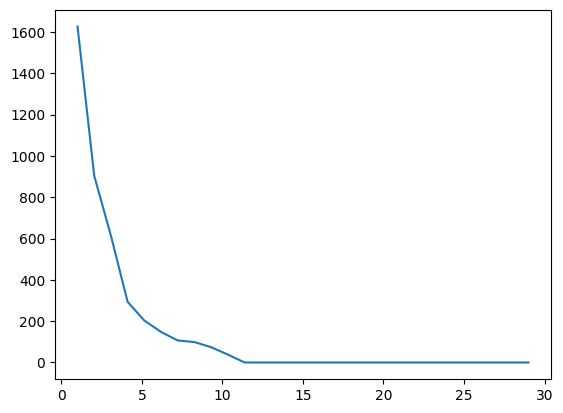

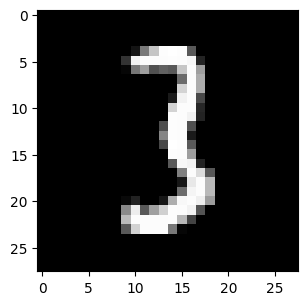

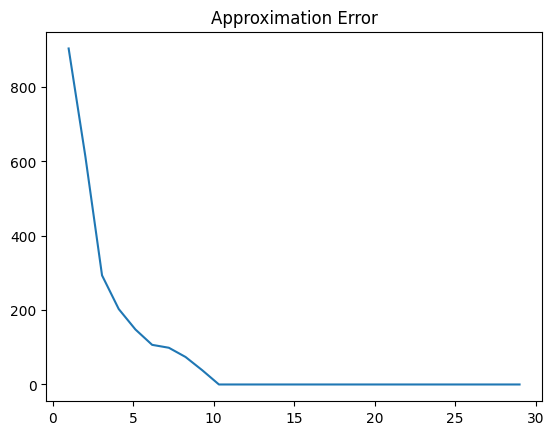

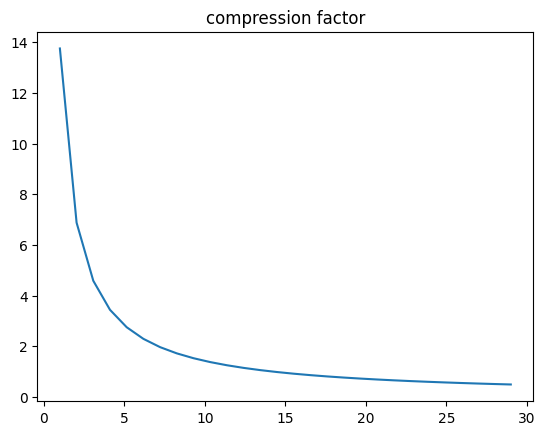

In [6]:
#visualizing dyads

img = X[:, 142]
img = np.reshape(img, (28, 28))

U, s, VT = np.linalg.svd(img)
A = np.zeros((28, 28))
print(s)  #the sing values are ordered. The first are more significant than lasts

plt.figure()
plt.plot(np.linspace(1, 29, 28), s)

niter = 28
plt.figure(figsize=(6 * 3, ((niter + 1)//3 + 1) * 4))
plt.subplot(((niter + 1)//3 + 1), 3, 1)
plt.imshow(img, cmap="gray")     #map a number with a color

err = np.zeros((niter,))
compress = np.zeros((niter,))

for i in range(niter):
    Ai = s[i] * np.outer(U[:, i], VT[i, :])   #riga di VT colonna di U
    A = A + Ai                                # i approx of image
    
    # plt.subplot(((niter + 1)//3 + 1), 3, i + 2)
    # plt.imshow(A, cmap = "gray")
    
    err[i] = np.linalg.norm(img - A, 2)        #error == norm of diff. original image - i approx of image
    compress[i] = 28**2/((i+1)* (1+ 28 + 28))
    #from k = 4 on, the figure's changes are negligible
    
plt.figure()
plt.title("Approximation Error")
plt.plot(np.linspace(1, niter + 1, niter), err)
plt.figure()
plt.title("compression factor")
plt.plot(np.linspace(1, niter + 1, niter), compress)



# Visualize the Ai == notice that every dyad has a different shape that put together contribute to the original image. Starting from A0, the first dyads are more significant
plt.show()

# print(A)
